### 1. Importing Visualization Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create path
path = 'C:/Users/hnguy/OneDrive/Documents/Achievement 6'

In [7]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ratings_data_cleaned.csv'))

### 2. Exploring Relationships

#### Create a correlation heatmap using matplotlib

In [8]:
# Create a correlation matrix
df.corr()

,REF,Review Date,Cocoa Percent,Rating
REF,1.000000,0.985076,0.037832,0.101030
Review Date,0.985076,1.000000,0.038219,0.099846
Cocoa Percent,0.037832,0.038219,1.000000,-0.165035
Rating,0.101030,0.099846,-0.165035,1.000000


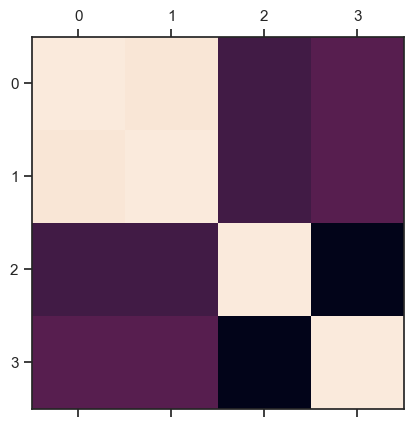

In [53]:
# Create a correlation heatmap
plt.matshow(df.corr())
plt.show()

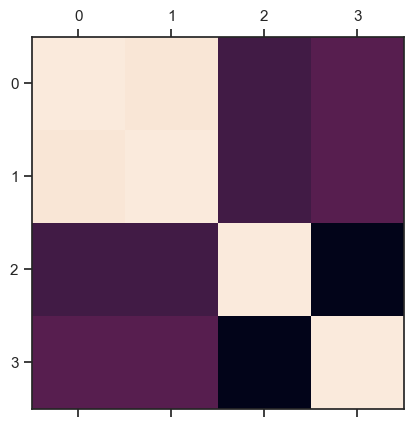

In [52]:
# Save figure
plt.matshow(df.corr())
plt.savefig("correlation.png") 

In [17]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\hnguy\\Downloads'

Text(0.5, 1.0, 'Correlation Matrix')

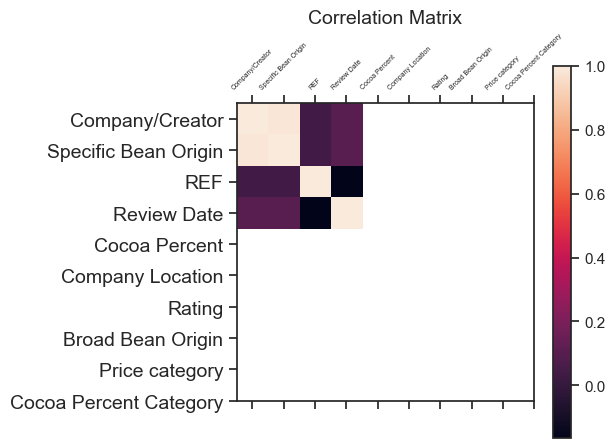

In [63]:
plt.matshow(df.corr(), fignum=f.number) # type of plot
cb = plt.colorbar() # add a colour legend (called colorbar)
plt.xticks(range(df.shape[1]), df.columns, fontsize=5, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
plt.title('Correlation Matrix', fontsize=14) # add title

The only two numerical variables that are significant for our questions are cocoa percentages and ratings. From the chart, we can tell that there is a weak negative correlation between cocoa percentage and rating.

#### Create a correlation heatmap

In [36]:
# Create a subset that only includes cocoa percent and rating columns
sub = df[['Cocoa Percent', 'Rating']]

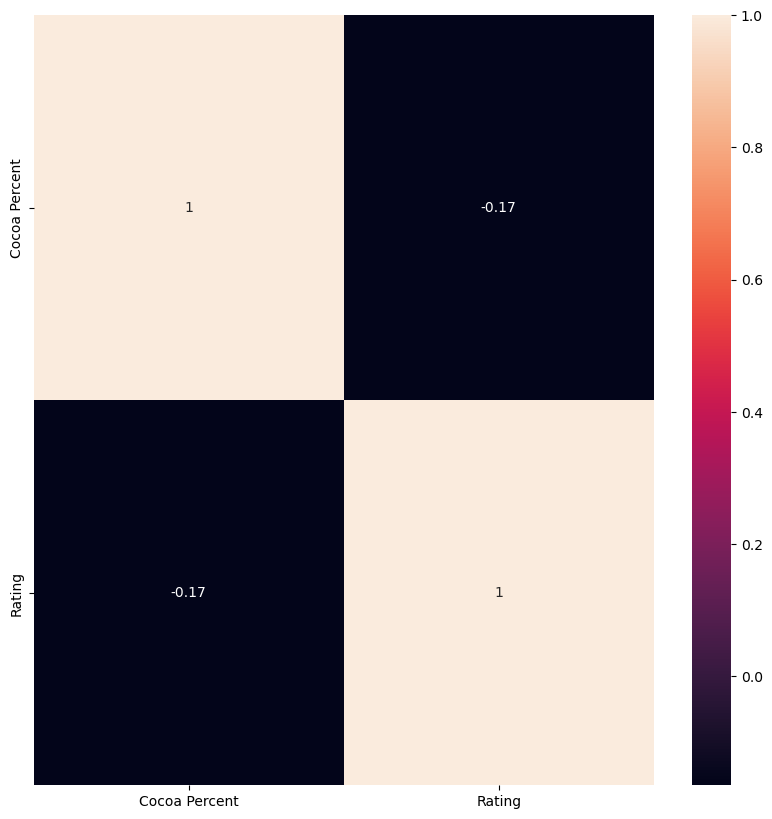

In [37]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### Create a scatterplot using seaborn

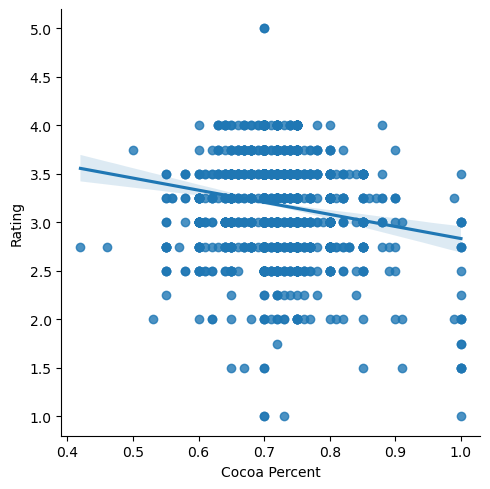

In [38]:
#Create a scatterplot for "cocoa percent" and "rating" column
sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = df)

Based on the scatterplot, we can see that there is a weak relationship between cocoa percentage and ratings. As the cocoa percentage increases, ratings will either increase or decrease. The ratings could range from 1 - 4.

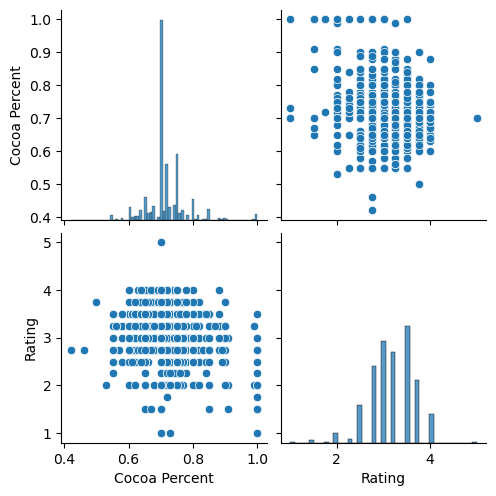

In [39]:
# Create a pair plot 
g = sns.pairplot(sub)

The pairplot also provided the same insight as the scatterplot.

#### Creating a categorical plot with a categorical variable that splits "cocoa percent" into different categories

<AxesSubplot:xlabel='Cocoa Percent', ylabel='Count'>

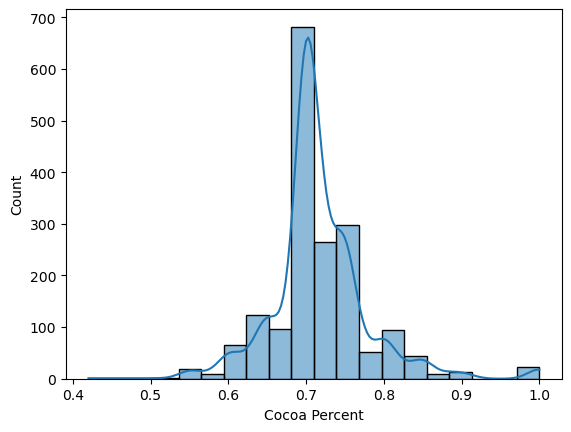

In [40]:
sns.histplot(df['Cocoa Percent'], bins = 20, kde = True)

In [45]:
df.loc[df['Cocoa Percent'] < 0.5, 'Cocoa Percent Category'] = 'Low percent'

In [46]:
df.loc[(df['Cocoa Percent'] >= 0.5) & (df['Cocoa Percent'] < 0.8), 'Cocoa Percent Category'] = 'Middle percent'

In [47]:
df.loc[df['Cocoa Percent'] >= 0.8, 'Cocoa Percent Category'] = 'High percent'

In [48]:
df['Cocoa Percent Category'].value_counts(dropna = False)

Middle percent    1610
High percent       183
Low percent          2
Name: Cocoa Percent Category, dtype: int64

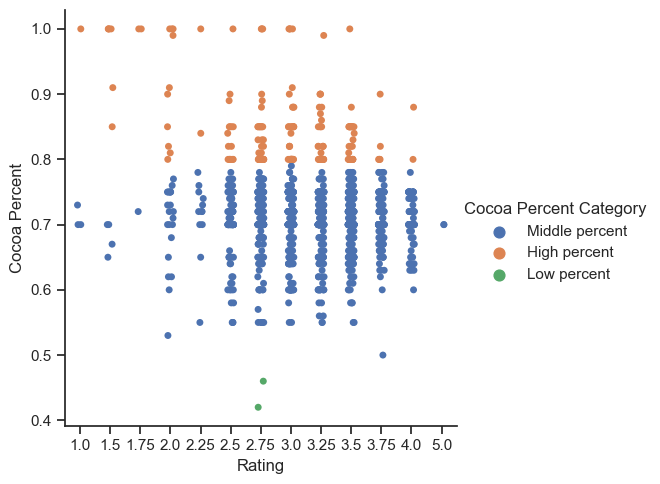

In [49]:
# Create a categorical plot in seaborn using the cocoa percent categories created above
sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Cocoa Percent Category", data=df)

The categorical plot provided similar insights to the scatterplot and pairplot. However, by dividing the cocoa percentages into categories, we can see that a majority of the candy bar have 50- 80% cocoa percentage.

In [51]:
# fig = g.get_figure()
# save figure in the working directory
g.savefig("scatterplot.png") 

Using these visualizations, I can answer the question "What's the relationship between cocoa solids percentage and rating?". The plots clearly shows that there is a very weak relationship between cocoa percentage and ratings. As for the two other questions, since they involve categorical data instead of numerical data, it would be best for me to use the pivot tables in Excel to find out their relationships. 